## Instructions for the datasets:

### File name codes:
'\_norm\_bhps': dataset for normalized BHPs <br>
'\_well\_loc': dataset for normalized well locations <br>
'\_train': dataset for pressure (normalized) and saturation <br>



### New datasets
case_name: 9w_bhp or 9w_bhp_rate <br>
case_suffix: single_out, fix_wl <br>
rel_x means realization number <br>
model_suffix: no_p <br>
    

In [1]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
plt.set_cmap('jet')

In [57]:
num_run = 400
n_timestep = 200

n_res_grid = 60
n_dim = 3600

In [25]:
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP/'
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP_RATE/'
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_MS_BHP_RATE/'
data_dir = '/data3/Astro/personal/zjin/datasets/9W_MS_BHP_RATE_GAU/'
# data_dir = '/data3/Astro/personal/zjin/datasets/7W_CHA/'

# case_name = '9w_bhp'
# case_name = '9w_bhp_rate'
case_name = '9w_ms_bhp_rate'
# case_name = '7w_cha'

state_file = case_name + '_train_n_' + str(num_run) + '_full'
ctrl_file = case_name + '_norm_bhps_n_' + str(num_run)
wl_file = case_name + '_well_loc_n_' + str(num_run)

# case_suffix = '_single_out_rel_3'
# case_suffix = '_single_out_rel_2'
# case_suffix = '_single_out_rel_1'
# case_suffix = '_fix_wl_rel_1'
case_suffix = '_var_wl_rel_1'
train_suffix = '_with_p'

state_data = state_file + case_suffix + '.mat'
ctrl_data = ctrl_file + case_suffix + '.mat'
well_loc_data = wl_file + case_suffix + '.mat'

# Section 1. Load and process field data (pressure and saturation)

In [4]:
hf_r = h5py.File(data_dir + state_data, 'r')
sat = np.array(hf_r.get('sat'))
pres = np.array(hf_r.get('pres'))
hf_r.close()

In [5]:
print(sat.shape)
sat = sat.T.reshape((num_run, n_timestep+1, 3600))
pres = pres.T.reshape(num_run,n_timestep+1, 3600)
print("sat shape:{}".format(sat.shape))
print("pres shape:{}".format(pres.shape))

(3600, 80400)
sat shape:(400, 201, 3600)
pres shape:(400, 201, 3600)


In [6]:
print(np.min(sat))
print(np.max(sat))

0.12215010405523191
0.7084770383170218


In [ ]:
# s_max = 0.6
# s_min = 0.1229

# s_diff = s_max - s_min
# sat0 = (sat - s_min) / s_diff

In [ ]:
# do not repeatly run this
# sat = sat0
# print(np.min(sat))
# print(np.max(sat))

In [7]:
# dt = 10 # timestep, not days
days_per_step = 10

case number: 1
case number: 101
case number: 201
case number: 301


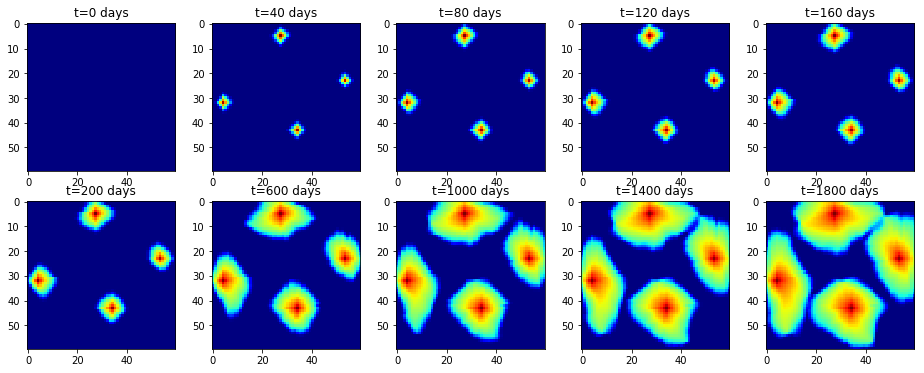

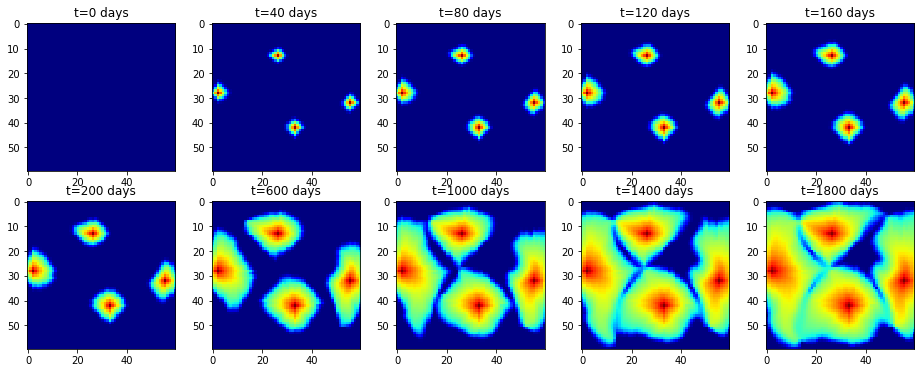

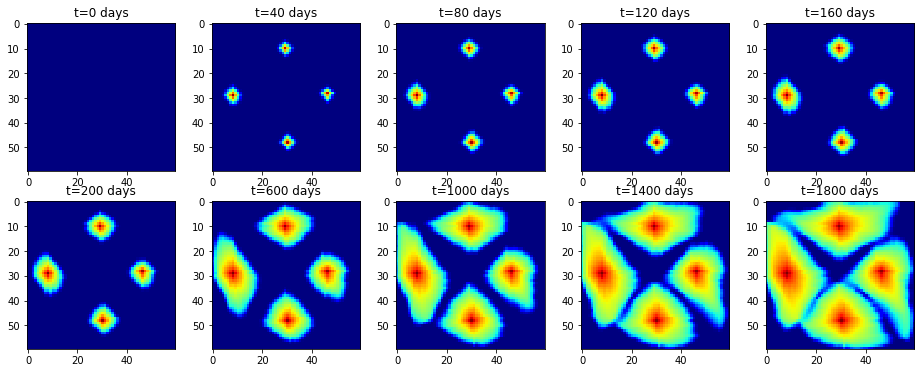

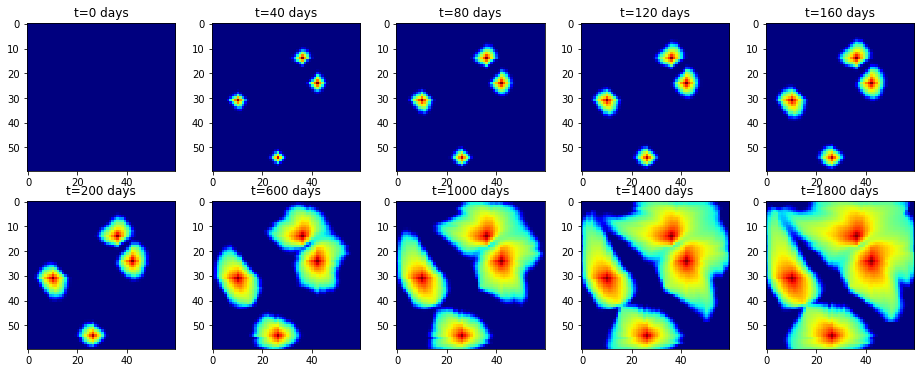

In [8]:
for k in range(4):
    i_case = 100*k+1
    plt.figure(figsize=(16,6))
    print("case number: %d"%(i_case))
    for idx in range(5):
        plt.subplot(2,5, idx+1)
        plt.imshow(sat[i_case, idx*4, :].reshape((60,60)))
        plt.title("t=%d days"%(idx*4*days_per_step))
    for idx in range(5):
        plt.subplot(2,5, idx+6)
        plt.imshow(sat[i_case, idx*40+20, :].reshape((60,60)))
        plt.title("t=%d days"%((idx*40+20)*days_per_step))
plt.show()

case number: 1
case number: 101
case number: 201
case number: 301


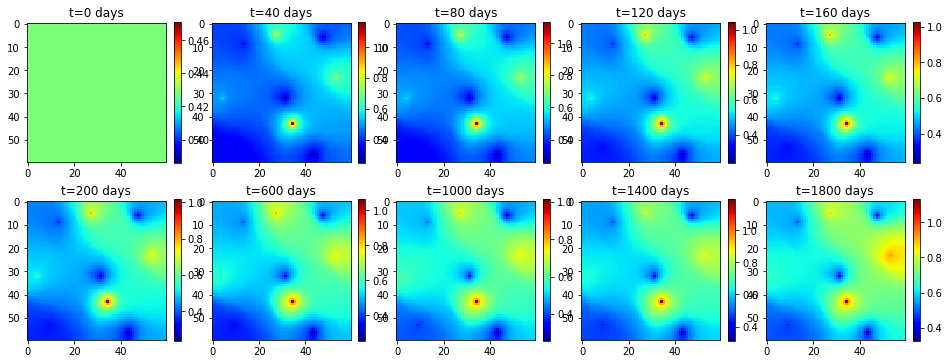

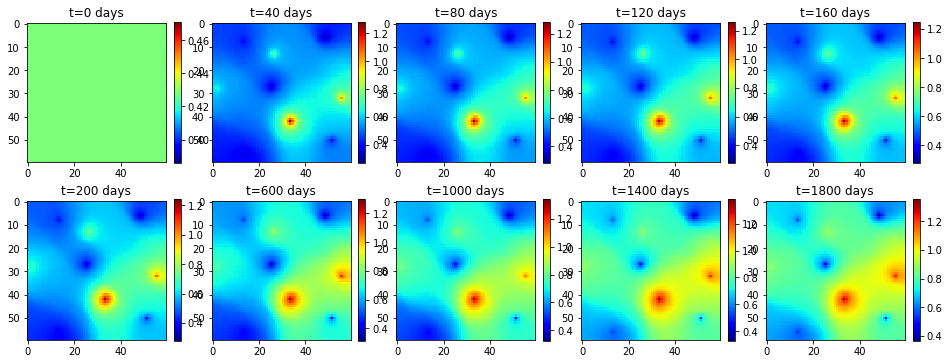

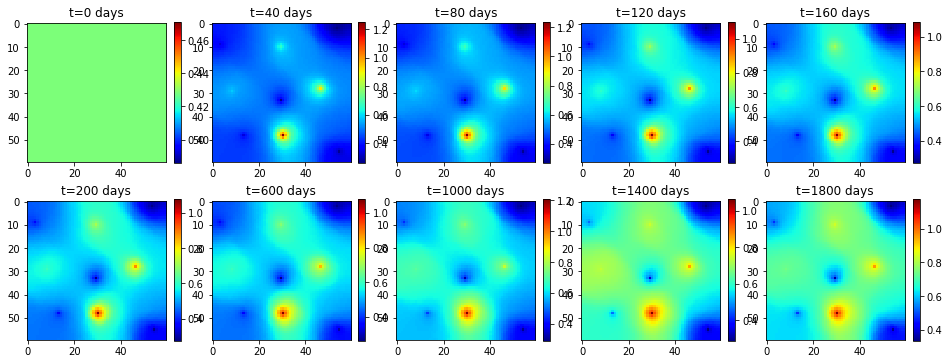

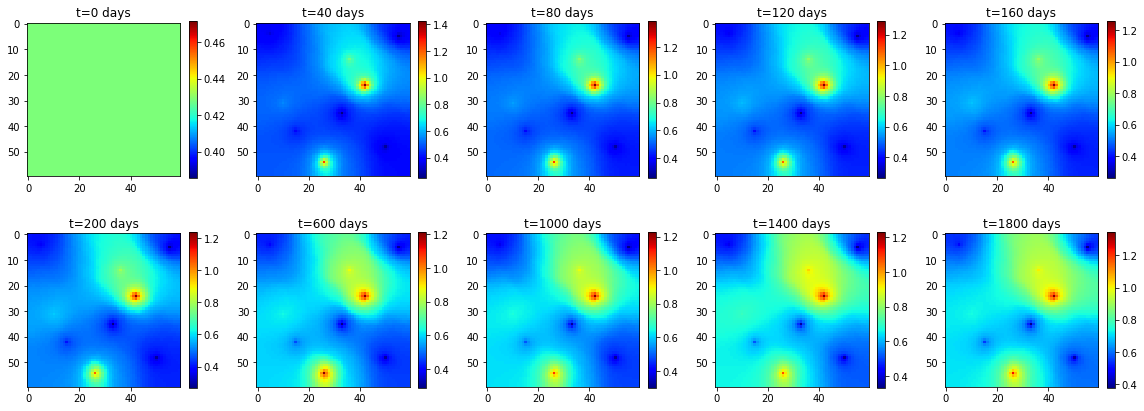

In [9]:
for k in range(4):
    i_case = 100*k+1
    plt.figure(figsize=(16,6))
    print("case number: %d"%(i_case))
    for idx in range(5):
        plt.subplot(2,5, idx+1)
        plt.imshow(pres[i_case, idx*4, :].reshape((60,60)))
        plt.title("t=%d days"%(idx*4*days_per_step))
        plt.colorbar(fraction=0.046)
        
    for idx in range(5):
        plt.subplot(2,5, idx+6)
        plt.imshow(pres[i_case, idx*40+20, :].reshape((60,60)))
        plt.title("t=%d days"%((idx*40+20)*days_per_step))
        plt.colorbar(fraction=0.046)
plt.tight_layout()
plt.show()

(400, 201, 3600)


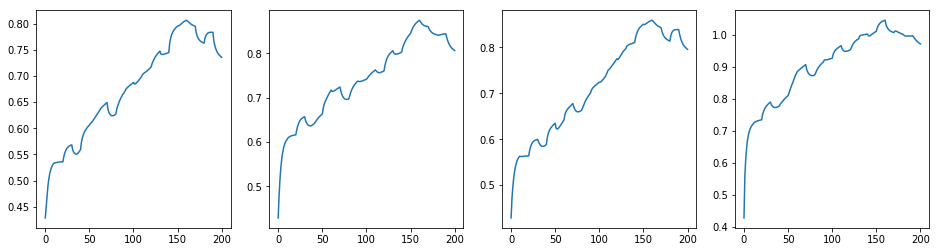

In [10]:
k=[1220, 1240, 2420, 2440]
print(pres.shape)
plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.plot(range(201), pres[101,:,k[i]])

(400, 201, 3600)


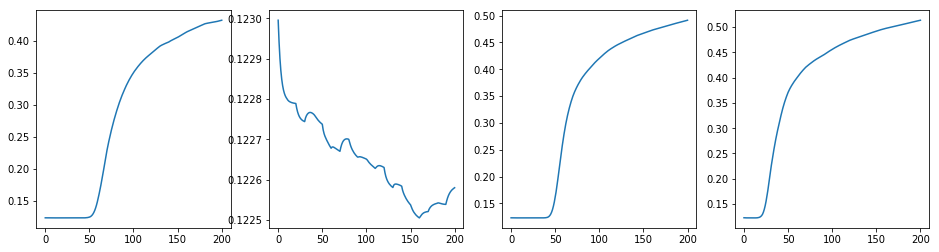

In [11]:
k=[1220, 1240, 2420, 2440]
print(pres.shape)
plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.plot(range(201), sat[101,:,k[i]])

#### Constant dt, use the following block (varying dt TBD)

In [12]:
dt = 10 # time step increment, not days
t_interval = 10 # not used, days

indt = np.array(range(0,200,dt))
indt1 = indt + dt
print(indt)
print(indt1)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200]


In [13]:
sat_t = sat[:, indt,:]
sat_t1 = sat[:, indt1, :]

pres_t = pres[:, indt,:]
pres_t1 = pres[:, indt1,:]

# we need a delta t
indt_del = indt1 - indt
print(indt_del)

indt_del = indt_del / max(indt_del)
print(indt_del)

[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
# print(sat_t1.shape)
# print(pres_t1.shape)

num_t = sat_t.shape[1]
num_case = sat_t.shape[0]

print("num_t:%d"%num_t)
print("num_case:%d"%num_case)

num_t:20
num_case:400


# Section 2. Read and process control data

In [40]:
n_prod = 5
n_inj = 4
n_well = n_prod + n_inj

In [17]:
hf_r = h5py.File(data_dir + ctrl_data)
bhp0 = np.array(hf_r.get('bhp'))
rate0 = np.array(hf_r.get('rate'))
hf_r.close()

In [18]:
print(bhp0.shape)
print(rate0.shape)

(400, 100)
(400, 80)


In [19]:
num_ctrl = bhp0.shape[1] // n_prod
assert bhp0.shape[1] // n_prod == rate0.shape[1] // n_inj, "num_ctrl error!"
print(num_ctrl)

20


In [20]:
bhp = np.concatenate((bhp0,rate0),axis=1)
print(bhp.shape)

(400, 180)


## Manipulate control data shape

In [43]:
# with 2 bhps per period
num_step = len(indt)
print(num_step)

20


Extend ctrl_step to time_step

In [44]:
bhp_b0 = bhp.reshape(num_case, n_well, num_ctrl)
bhp_b1 = np.repeat(bhp_b0[..., np.newaxis], num_step // num_ctrl, axis=3)
assert num_step // num_ctrl * num_ctrl == num_step, "no exaxt division num_step = %d, num_ctrl=%d"%(num_step, num_ctrl)

print(bhp_b1.shape)
bhp_b2 = bhp_b1.reshape(num_case, n_well, num_step)
print(bhp_b2.shape)

(400, 9, 20, 1)
(400, 9, 20)


In [45]:
tmp = np.array(range(num_step)) - 1
tmp1 = np.array(range(num_step))
tmp[0] = 0

print(tmp)
print(tmp1)

[ 0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [46]:
bhp_tt = bhp_b2[:,:, tmp]
bhp_tt1 = bhp_b2[:,:, tmp1]
print(bhp_tt.shape)
print(bhp_tt1.shape)

bhp_tt0 = np.concatenate((bhp_tt, bhp_tt1), axis=1)
bhp_t = np.swapaxes(bhp_tt0,1,2)
print(bhp_t.shape)
print(bhp.shape)
print(bhp[0,:20]) # these two should be same
print(bhp_t[0,:,9]) # these two should be same
print(bhp_t[0,:,0])

(400, 9, 20)
(400, 9, 20)
(400, 20, 18)
(400, 180)
[0.13587051 0.12878068 0.1206873  0.14205642 0.12958641 0.11999546
 0.12320757 0.13701367 0.13845296 0.12410414 0.13126885 0.12551494
 0.11810615 0.12351489 0.11682298 0.12215029 0.13182615 0.11585461
 0.13686083 0.12856531]
[0.13587051 0.12878068 0.1206873  0.14205642 0.12958641 0.11999546
 0.12320757 0.13701367 0.13845296 0.12410414 0.13126885 0.12551494
 0.11810615 0.12351489 0.11682298 0.12215029 0.13182615 0.11585461
 0.13686083 0.12856531]
[0.13587051 0.13587051 0.12878068 0.1206873  0.14205642 0.12958641
 0.11999546 0.12320757 0.13701367 0.13845296 0.12410414 0.13126885
 0.12551494 0.11810615 0.12351489 0.11682298 0.12215029 0.13182615
 0.11585461 0.13686083]


do not run the following block if you are not sure what you are doing

In [ ]:
# # with 1 bhp per period
# print(bhp.shape)
# bhp_tt0 = np.repeat(bhp[:,:, np.newaxis], num_t, axis=2)
# bhp_t = np.swapaxes(bhp_tt0,1,2)
# print(bhp_t.shape)

In [47]:
n_ctrl = bhp_t.shape[2]
print(n_ctrl)

18


In [48]:
# extend dimension of delta_t
print(indt_del.shape)
indt_dd = np.repeat(indt_del[np.newaxis,:], num_case, axis = 0)
indt_d = indt_dd[:,:,np.newaxis]
print(indt_d.shape)

(20,)
(400, 20, 1)


In [49]:
print(indt)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]


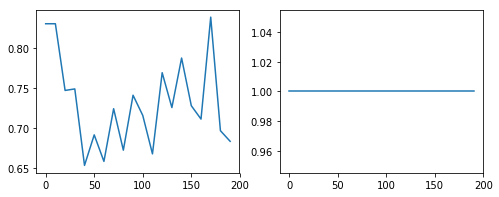

In [50]:
# check control sequence
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(indt, bhp_t[0,:,7])
plt.subplot(122)
plt.plot(indt, indt_d[0,:,0])

In [51]:
print(sat_t.shape)
print(pres_t.shape)
print(indt_d.shape)

(400, 20, 3600)
(400, 20, 3600)
(400, 20, 1)


### check desired shapes

In [52]:
print(sat_t.shape)
print(sat_t1.shape)
print(pres_t.shape)
print(pres_t1.shape)
print(bhp_t.shape)
print(indt_d.shape)

(400, 20, 3600)
(400, 20, 3600)
(400, 20, 3600)
(400, 20, 3600)
(400, 20, 18)
(400, 20, 1)


# Section 3. Load and process well location data

In [54]:
hf_r3 = h5py.File(data_dir + well_loc_data)
# print(list(hf_r3.keys()))
well_loc = np.array(hf_r3.get('well_loc')).astype(int)
hf_r3.close()

print(well_loc.shape)
print(well_loc[0,:])
well_loc_ids = well_loc.reshape(num_run, 2, n_well).swapaxes(1,2) # shape (400, 2, 9), prod comes first
print(well_loc_ids[0,...])
print(well_loc_ids.shape)

(400, 18)
[ 3  4 31 55 43  8 26 30 47  7 47 28  4 55 32  6 50 29]
[[ 3  7]
 [ 4 47]
 [31 28]
 [55  4]
 [43 55]
 [ 8 32]
 [26  6]
 [30 50]
 [47 29]]
(400, 9, 2)


Text(0, 0.5, 'y')

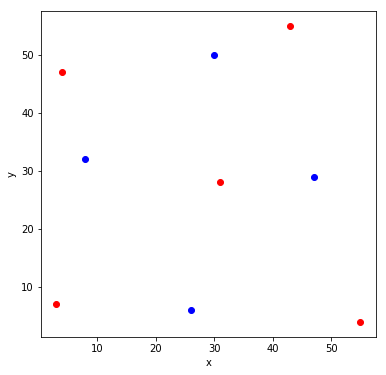

In [42]:
n_rum = 0;
plt.figure(figsize=(6,6))
plt.scatter(well_loc[n_rum,:n_prod],well_loc[n_rum,n_well:n_well+n_prod],c='r')
plt.scatter(well_loc[n_rum,n_prod:n_well],well_loc[n_rum,n_well+n_prod:],c='b')
plt.xlabel('x')
plt.ylabel('y')

In [59]:
well_loc = bhp_b2
n_run, n_well, n_timestep = well_loc.shape
n_dim = n_res_grid**2

print(n_run)
print(n_well)
print(n_timestep)
print(n_dim)

400
9
20
3600


In [ ]:
def well_ctrl_encode(well_ctrl, well_loc, n_res_grid):
    '''
    Encode the well location and well control to map
    
    @params: well_ctrl: shape = (n_run, n_well, n_timestep)
             well_loc: shape = (n_run, n_well, 2), the last dimension accounts for (x, y) coordinates
     
    @output: wc_encode: shape = (n_run, n_timestep, n_res_grid, n_res_grid, 2)
             the last dimension of 2 accounts for control info at (t, t+1) 
    '''
    n_run, n_well, n_timestep = well_ctrl.shape
    n_dim = n_res_grid**2
    
    wc_mask = np.zeros((n_run, n_dim))
    
    well_loc_1d = well_loc[:,:,0]*n_res_grid+ well_loc[:,:,1] # shape = (n_run, n_well), note: n_res_grid = ny
    
    wc_mask[well]
    

# Section 4. Merge and output data

### (a) Pick a fraction of non-changing control periods, and all changing control periods

In [ ]:
print(bhp_t[0, 15, [0,9]])
slt_col = np.array((range(0, 100, 5)))
print(slt_col)
#
np.random.seed(1047)
slt_col_2 = np.random.randint(1,5,size=20) + slt_col
print(slt_col_2- slt_col)

slt_cols = np.sort(np.concatenate((slt_col, slt_col_2), axis=0))
print(slt_cols)

### (b) If choose not to pick column, run the following one block

In [ ]:
slt_cols = np.array((range(num_t)))
print(slt_cols)

### Update with either (a) or (b)

In [ ]:
num_t_slt = slt_cols.shape[0]
print(num_t)
sat_t_slt = sat_t[:,slt_cols,:]
sat_t1_slt = sat_t1[:,slt_cols,:]
pres_t_slt = pres_t[:,slt_cols,:]
pres_t1_slt = pres_t1[:,slt_cols,:]
bhp_t_slt = bhp_t[:,slt_cols,:]
indt_d_slt = indt_d[:,slt_cols,:]

print(sat_t_slt.shape)
print(sat_t1_slt.shape)
print(pres_t_slt.shape)
print(pres_t1_slt.shape)
print(bhp_t_slt.shape)
print(indt_d_slt.shape)

## Train/Test split

In [ ]:
num_run_per_case = 75
sat_t_train = np.zeros((num_run_per_case*4, num_t_slt, 3600))
sat_t1_train = np.zeros((num_run_per_case*4, num_t_slt, 3600))
bhp_train = np.zeros((num_run_per_case*4, num_t_slt, n_ctrl))
dt_train = np.zeros((num_run_per_case*4, num_t_slt, 1))

pres_t_train = np.zeros((num_run_per_case*4, num_t_slt, 3600))
pres_t1_train = np.zeros((num_run_per_case*4, num_t_slt, 3600))


num_run_eval = 100 - num_run_per_case # 25 cases
sat_t_eval = np.zeros((num_run_eval*4, num_t_slt, 3600))
sat_t1_eval = np.zeros((num_run_eval*4, num_t_slt, 3600))

bhp_eval = np.zeros((num_run_eval*4, num_t_slt, n_ctrl))
dt_eval = np.zeros((num_run_eval*4, num_t_slt, 1))

pres_t_eval = np.zeros((num_run_eval*4, num_t_slt, 3600))
pres_t1_eval = np.zeros((num_run_eval*4, num_t_slt, 3600))


for k in range(4):
    ind0 = k * num_run_per_case
    sat_t_train[ind0:ind0+num_run_per_case,...] = sat_t_slt[k*100:k*100+num_run_per_case, :, :]
    sat_t1_train[ind0:ind0+num_run_per_case,...] = sat_t1_slt[k*100:k*100+num_run_per_case, :, :]
    pres_t_train[ind0:ind0+num_run_per_case,...] = pres_t_slt[k*100:k*100+num_run_per_case, :, :]
    pres_t1_train[ind0:ind0+num_run_per_case,...] = pres_t1_slt[k*100:k*100+num_run_per_case, :, :]
    bhp_train[ind0:ind0+num_run_per_case,...] = bhp_t_slt[k*100: k*100+num_run_per_case, :, :]
    dt_train[ind0:ind0+num_run_per_case,...] = indt_d_slt[k*100: k*100+num_run_per_case, :, :]
    # Eval set
    ind1 = k*num_run_eval
    sat_t_eval[ind1:ind1+num_run_eval,...] = sat_t_slt[k*100+num_run_per_case:k*100+100, :, :]
    sat_t1_eval[ind1:ind1+num_run_eval,...] = sat_t1_slt[k*100+num_run_per_case:k*100+100, :, :]
    pres_t_eval[ind1:ind1+num_run_eval,...] = pres_t_slt[k*100+num_run_per_case:k*100+100, :, :]
    pres_t1_eval[ind1:ind1+num_run_eval,...] = pres_t1_slt[k*100+num_run_per_case:k*100+100, :, :]
    bhp_eval[ind1:ind1+num_run_eval,...] = bhp_t_slt[k*100+num_run_per_case: k*100+100, :, :]
    dt_eval[ind1:ind1+num_run_eval,...] = indt_d_slt[k*100+num_run_per_case: k*100+100, :, :]

In [ ]:
print(sat_t_train.shape)
print(sat_t1_train.shape)
print(pres_t_train.shape)
print(pres_t1_train.shape)
print(bhp_train.shape)
print(dt_train.shape)

print(sat_t_eval.shape)
print(sat_t1_eval.shape)
print(pres_t_eval.shape)
print(pres_t1_eval.shape)
print(bhp_eval.shape)
print(dt_eval.shape)

n_train_run = sat_t_train.shape[0]
n_eval_run = sat_t_eval.shape[0]

In [ ]:
sat_t_train = sat_t_train.reshape((num_run_per_case*4*num_t_slt, 60, 60, 1))
sat_t1_train = sat_t1_train.reshape((num_run_per_case*4*num_t_slt, 60, 60, 1))
pres_t_train = pres_t_train.reshape((num_run_per_case*4*num_t_slt, 60, 60, 1))
pres_t1_train = pres_t1_train.reshape((num_run_per_case*4*num_t_slt, 60, 60, 1))
bhp_train = bhp_train.reshape((num_run_per_case*4*num_t_slt, n_ctrl))
dt_train = dt_train.reshape((num_run_per_case*4*num_t_slt, 1))
# Eval
sat_t_eval = sat_t_eval.reshape((num_run_eval*4*num_t_slt, 60, 60, 1))
sat_t1_eval = sat_t1_eval.reshape((num_run_eval*4*num_t_slt, 60, 60, 1))
pres_t_eval = pres_t_eval.reshape((num_run_eval*4*num_t_slt, 60, 60, 1))
pres_t1_eval = pres_t1_eval.reshape((num_run_eval*4*num_t_slt, 60, 60, 1))
bhp_eval = bhp_eval.reshape((num_run_eval*4*num_t_slt, n_ctrl))
dt_eval = dt_eval.reshape((num_run_eval*4*num_t_slt, 1))

In [ ]:
print(sat_t_train.shape)
print(sat_t1_train.shape)
print(pres_t_train.shape)
print(pres_t1_train.shape)
print(bhp_train.shape)
print(dt_train.shape)


print(sat_t_eval.shape)
print(sat_t1_eval.shape)
print(pres_t_eval.shape)
print(pres_t1_eval.shape)
print(bhp_eval.shape)
print(dt_eval.shape)

n_train_step = sat_t_train.shape[0]
n_eval_step = sat_t_eval.shape[0]
print(n_train_step)
print(n_eval_step)

In [ ]:
state_t_train = np.concatenate((sat_t_train, pres_t_train),axis=3)
state_t1_train = np.concatenate((sat_t1_train, pres_t1_train),axis=3)

state_t_eval = np.concatenate((sat_t_eval, pres_t_eval),axis=3)
state_t1_eval = np.concatenate((sat_t1_eval, pres_t1_eval),axis=3)

print(state_t_train.shape)
print(state_t1_train.shape)
print(state_t_eval.shape)
print(state_t1_eval.shape)

In [ ]:
num_train = num_run_per_case*4*num_t_slt
shuffle_ind_train = np.random.permutation(num_train)
state_t_train = state_t_train[shuffle_ind_train, ...]
state_t1_train = state_t1_train[shuffle_ind_train, ...]
bhp_train = bhp_train[shuffle_ind_train, ...]
dt_train = dt_train[shuffle_ind_train, ...]

In [ ]:
num_eval = num_run_eval*4*num_t_slt
shuffle_ind_eval = np.random.permutation(num_eval)
state_t_eval = state_t_eval[shuffle_ind_eval, ...]
state_t1_eval = state_t1_eval[shuffle_ind_eval, ...]
bhp_eval = bhp_eval[shuffle_ind_eval, ...]
dt_eval = dt_eval[shuffle_ind_eval, ...]

In [ ]:
# k = [0,1,2,3]
k = list(range(0,10,2))
for i in range(len(k)):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.imshow(state_t_train[k[i], :,:,0])
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.imshow(state_t1_train[k[i], :,:,0])
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.imshow(np.fabs(state_t1_train[k[i], :,:,0] - state_t_train[k[i],:,:,0]))
    plt.colorbar()
plt.show()

In [ ]:
for i in range(len(k)):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.imshow(state_t_train[k[i], :,:,1])
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.imshow(state_t1_train[k[i], :,:,1])
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.imshow(np.fabs(state_t1_train[k[i], :,:,1] - state_t_train[k[i],:,:,1]))
    plt.colorbar()
plt.show()

In [ ]:
# select subset of training
n_train_step = 6000
state_t_train = state_t_train[:n_train_step, ...]
state_t1_train = state_t1_train[:n_train_step, ...]
bhp_train = bhp_train[:n_train_step, ...]
dt_train = dt_train[:n_train_step, ...]

In [ ]:
print(dt_train.shape)
dt = 100 # days

In [ ]:
hf_w = h5py.File(data_dir + case_name + '_e2c_train' + case_suffix + train_suffix+ '_n%d_dt%dday_nt%d_nrun%d.mat' %(n_train_step, dt, num_t_slt, n_train_run), 'w')
hf_w.create_dataset('state_t', data=state_t_train)
hf_w.create_dataset('state_t1', data=state_t1_train)
hf_w.create_dataset('bhp', data = bhp_train)
hf_w.create_dataset('dt', data = dt_train)
hf_w.close()

In [ ]:
print(bhp_eval.shape)
print(dt_eval.shape)

In [ ]:
hf_w = h5py.File(data_dir + case_name + '_e2c_eval' + case_suffix + train_suffix+'_n%d_dt%dday_nt%d_nrun%d.mat'%(n_eval_step, dt, num_t_slt, n_eval_run), 'w')
hf_w.create_dataset('state_t', data=state_t_eval)
hf_w.create_dataset('state_t1', data=state_t1_eval)
hf_w.create_dataset('bhp', data = bhp_eval)
hf_w.create_dataset('dt', data = dt_eval)
hf_w.close()